## Loading Data

## Statistis for my data


In [7]:
# Identitfy version of software used
pd.__version__

'0.17.0'

In [8]:
#Identify version of software used
np.__version__

'1.10.1'

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#regular expressions library
import re

#stats library
import statsmodels.api as sm
import scipy

#T-test is imported to complete the statistical analysis
from scipy.stats import ttest_ind
from scipy import stats

#The function below is used to show the plots within the notebook
%matplotlib inline

## Loading Data using Pandas

In [13]:
#loaded data with a time index
data=pd.read_csv('../data/Testdata.dat', delimiter=' ', index_col='time')

In [14]:
# Print the first 8 rows of the dataset 
data.head(8)

,date,plate,strain,frame,ID,persistance,area,speed,angularspeed,length,...,bias,pathlen,curve,dir,loc_x,loc_y,vel_x,vel_y,orient,crab
time,,,,,,,,,,,,,,,,,,,,,
15.039,20120731,20120731_120745,N2,0,1,234.9,0.102789,NaN,NaN,0.9531,...,1,0.000,21.0,0,13.3322,36.2338,NaN,NaN,34.2,NaN
15.080,20120731,20120731_120745,N2,1,1,234.9,0.101331,NaN,NaN,0.9369,...,1,0.002,19.5,0,13.3333,36.2354,NaN,NaN,34.3,NaN
15.125,20120731,20120731_120745,N2,2,1,234.9,0.099873,NaN,NaN,0.9369,...,1,0.007,20.0,0,13.3378,36.2375,NaN,NaN,34.3,NaN
15.160,20120731,20120731_120745,N2,3,1,234.9,0.100602,NaN,NaN,0.9369,...,1,0.008,22.3,0,13.3386,36.2387,NaN,NaN,34.3,NaN
15.198,20120731,20120731_120745,N2,4,1,234.9,0.102060,NaN,NaN,0.9585,...,1,0.011,23.7,0,13.3411,36.2405,NaN,NaN,34.3,NaN
15.240,20120731,20120731_120745,N2,5,1,234.9,0.102789,NaN,NaN,0.9369,...,1,0.017,23.0,0,13.3460,36.2427,NaN,NaN,34.3,NaN
15.280,20120731,20120731_120745,N2,6,1,234.9,0.102789,NaN,NaN,0.9531,...,1,0.019,22.5,0,13.3474,36.2450,NaN,NaN,34.4,NaN
15.321,20120731,20120731_120745,N2,7,1,234.9,0.102789,0.0698,1.2,0.9531,...,1,0.024,21.8,0,13.3514,36.2476,0.0589,0.0374,34.5,0.0026


In [15]:
#Print the last 8 rows of the dataset 
data.tail(8)

,date,plate,strain,frame,ID,persistance,area,speed,angularspeed,length,...,bias,pathlen,curve,dir,loc_x,loc_y,vel_x,vel_y,orient,crab
time,,,,,,,,,,,,,,,,,,,,,
129.088,20120807,20120807_140115,N2,2831,11,135.5,0.091125,0.1901,5.4,0.8694,...,1,16.310,29.7,0.000,30.1282,27.1469,0.0104,0.1898,85.9,0.0031
129.128,20120807,20120807_140115,N2,2832,11,135.5,0.089667,0.1906,5.5,0.8667,...,1,16.318,28.2,0.000,30.1283,27.1545,0.0102,0.1903,85.6,0.0044
129.168,20120807,20120807_140115,N2,2833,11,135.5,0.091854,0.1908,5.4,0.8667,...,1,16.324,31.7,0.001,30.1291,27.1602,0.0101,0.1905,85.4,0.0054
129.208,20120807,20120807_140115,N2,2834,11,135.5,0.093312,0.1849,5.1,0.8667,...,1,16.331,30.6,0.001,30.1290,27.1671,0.0063,0.1848,85.2,0.0091
129.249,20120807,20120807_140115,N2,2835,11,135.5,0.093312,0.1834,4.6,0.8667,...,1,16.338,31.0,0.000,30.1286,27.1748,0.0060,0.1833,85.0,0.0101
129.289,20120807,20120807_140115,N2,2836,11,135.5,0.091125,0.1799,4.5,0.8397,...,1,16.345,25.9,0.000,30.1293,27.1811,0.0052,0.1798,84.8,0.0110
129.329,20120807,20120807_140115,N2,2837,11,135.5,0.093312,0.1819,4.2,0.8883,...,1,16.352,30.0,0.000,30.1292,27.1884,0.0038,0.1819,84.6,0.0133
129.368,20120807,20120807_140115,N2,2838,11,135.5,0.093312,0.1823,3.7,0.8883,...,1,16.359,23.3,0.000,30.1291,27.1956,0.0041,0.1823,84.4,0.0137


In [16]:
#converted to date-time object
data.index = pd.to_datetime(data.index, unit='s')
print(data.index.dtype)

datetime64[ns]


In [18]:
data.head()

,date,plate,strain,frame,ID,persistance,area,speed,angularspeed,length,...,bias,pathlen,curve,dir,loc_x,loc_y,vel_x,vel_y,orient,crab
time,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:15.039,20120731,20120731_120745,N2,0,1,234.9,0.102789,NaN,NaN,0.9531,...,1,0.000,21.0,0,13.3322,36.2338,NaN,NaN,34.2,NaN
1970-01-01 00:00:15.080,20120731,20120731_120745,N2,1,1,234.9,0.101331,NaN,NaN,0.9369,...,1,0.002,19.5,0,13.3333,36.2354,NaN,NaN,34.3,NaN
1970-01-01 00:00:15.125,20120731,20120731_120745,N2,2,1,234.9,0.099873,NaN,NaN,0.9369,...,1,0.007,20.0,0,13.3378,36.2375,NaN,NaN,34.3,NaN
1970-01-01 00:00:15.160,20120731,20120731_120745,N2,3,1,234.9,0.100602,NaN,NaN,0.9369,...,1,0.008,22.3,0,13.3386,36.2387,NaN,NaN,34.3,NaN
1970-01-01 00:00:15.198,20120731,20120731_120745,N2,4,1,234.9,0.102060,NaN,NaN,0.9585,...,1,0.011,23.7,0,13.3411,36.2405,NaN,NaN,34.3,NaN


In [19]:
#now that your data is a date-time object you can use data.resample to take sections
#of whatever values (mean,sum, ect) you want to look at for whatever time chunk. Ex:
#resample_mean=resample.data('10s', how=('mean'))

In [22]:
# make a groupby object which groups by strains
grouped_data = data.groupby('strain')
type(grouped_data)

pandas.core.groupby.DataFrameGroupBy

In [23]:
resampled_groups = data.groupby('strain').resample('10s', how=('mean'))
resampled_groups

ID  angularspeed      area    aspect  \
strain time                                                                
MX1027 1970-01-01 00:03:00  389.000000           NaN  0.086022  0.138429   
       1970-01-01 00:03:10  390.300995     10.124304  0.084303  0.241577   
       1970-01-01 00:03:20  395.277228      6.837703  0.081901  0.237184   
       1970-01-01 00:03:30  425.441371      6.810565  0.077308  0.225755   
       1970-01-01 00:03:40  431.360406      7.450785  0.076200  0.231310   
       1970-01-01 00:03:50  436.729175      8.655345  0.077071  0.270491   
       1970-01-01 00:04:00  437.613195      6.126619  0.077209  0.231828   
N2     1970-01-01 00:00:10    7.750000      3.447222  0.095887  0.182835   
       1970-01-01 00:00:20    7.269263      4.929080  0.095741  0.187995   
       1970-01-01 00:00:30    6.717345      3.665136  0.096370  0.186486   
       1970-01-01 00:00:40    6.500000      3.310643  0.095832  0.183609   
       1970-01-01 00:00:50    6.506032      2.398660  0.095311  0.189161   
       1970-01-01 00:01:00    6.500000      2.961269  0.095840  0.182327   
       1970-01-01 00:01:10    6.353846      4.984599  0.095773  0.224364   
       1970-01-01 00:01:20    5.787732      4.788136  0.096750  0.228609   
       1970-01-01 00:01:30    5.806114      4.207562  0.096944  0.280727   
       1970-01-01 00:01:40    5.800000      5.567470  0.098238  0.334957   
       1970-01-01 00:01:50    5.949904      2.987476  0.098246  0.211426   
       1970-01-01 00:02:00    5.939611      6.830092  0.098703  0.307559   
       1970-01-01 00:02:10    4.314440      3.876923  0.098499  0.209846   
       1970-01-01 00:02:20    4.333333      2.109237  0.097940  0.173357   
       1970-01-01 00:02:30    2.193676      3.191566  0.103064  0.290524   
       1970-01-01 00:02:40    2.000000      2.622892  0.104061  0.224685   
       1970-01-01 00:02:50    2.000000      1.035223  0.106123  0.173516   
       1970-01-01 00:03:00    2.000000      1.288353  0.106390  0.165042   
       1970-01-01 00:03:10    2.000000      2.685020  0.105937  0.284344   
       1970-01-01 00:03:20    1.308219      4.499315  0.108109  0.472473   
       1970-01-01 00:03:30    1.000000      3.780321  0.110861  0.414643   
       1970-01-01 00:03:40    1.000000      6.148193  0.113021  0.325871   
       1970-01-01 00:03:50    1.000000     11.157551  0.105827  0.441188   
       1970-01-01 00:04:00    1.000000      7.475641  0.106416  0.310893   

                                bias      crab      curve             date  \
strain time                                                                  
MX1027 1970-01-01 00:03:00  1.000000       NaN  23.600000  20120807.000000   
       1970-01-01 00:03:10  0.912935  0.010344  26.828109  20120807.000000   
       1970-01-01 00:03:20  0.594059  0.008999  26.634777  20120807.000000   
       1970-01-01 00:03:30  0.817198  0.009074  25.204330  20120807.000000   
       1970-01-01 00:03:40  0.898260  0.011189  26.399196  20120807.000000   
       1970-01-01 00:03:50  0.785933  0.012796  28.468568  20120807.000000   
       1970-01-01 00:04:00  0.856870  0.008038  25.941483  20120807.000000   
N2     1970-01-01 00:00:10  0.846774  0.007637  23.171573  20120788.000000   
       1970-01-01 00:00:20  0.861640  0.009333  25.075559  20120791.321458   
       1970-01-01 00:00:30  0.915061  0.007561  23.915346  20120784.812991   
       1970-01-01 00:00:40  0.562918  0.005889  23.035007  20120781.666667   
       1970-01-01 00:00:50  0.674263  0.005722  22.970107  20120781.734584   
       1970-01-01 00:01:00  0.790823  0.005572  23.384683  20120781.666667   
       1970-01-01 00:01:10  0.747552  0.008209  27.486503  20120780.532867   
       1970-01-01 00:01:20  0.330912  0.009712  27.795319  20120776.452785   
       1970-01-01 00:01:30  0.202087  0.007620  29.639099  20120776.673371   
       1970-01-01 00:01:40  0.466867  0.005310  26.837189  20120776.600000   
       1970-01-01 00:01:50  0.501006  0.00590

In [25]:
#now extract desire columns:
speed_strain=resampled_groups[['speed']]
#you don't need to do [['speed', 'strain']] because strain is now an index with the date-time
speed_strain.head()

speed
strain time                         
MX1027 1970-01-01 00:03:00       NaN
       1970-01-01 00:03:10  0.133191
       1970-01-01 00:03:20  0.105690
       1970-01-01 00:03:30  0.124361
       1970-01-01 00:03:40  0.151414

In [13]:
# Commands used to check the title names in each column as some of the titles were omitted
data.dtypes.head()


date        int64
plate      object
time      float64
strain     object
frame       int64
dtype: object

### Hypothesis  and Questions

..........
### Things I need to do:
Format the date properly. I need help do use regular expression to fix the format of my date


In [20]:
# Here we extract only two columns from the data as these are the main variables for the statistcal analysis

strain_df=data[['strain','speed']]
strain_df.head()

,strain,speed
time,,
1970-01-01 00:00:15.039,N2,NaN
1970-01-01 00:00:15.080,N2,NaN
1970-01-01 00:00:15.125,N2,NaN
1970-01-01 00:00:15.160,N2,NaN
1970-01-01 00:00:15.198,N2,NaN


In [21]:
# Eliminate NaN from the dataset 

strain_df=strain_df.dropna()
strain_df.head()

,strain,speed
time,,
1970-01-01 00:00:15.321,N2,0.0698
1970-01-01 00:00:15.361,N2,0.0668
1970-01-01 00:00:15.398,N2,0.0720
1970-01-01 00:00:15.441,N2,0.0783
1970-01-01 00:00:15.481,N2,0.0793


In [17]:
#Resample the data to group by strain

strain_resampled=strain_df.groupby('strain')
strain_resampled.head()

,strain,speed
7,N2,0.0698
8,N2,0.0668
9,N2,0.0720
10,N2,0.0783
11,N2,0.0793
9999,MX1027,0.0665
10000,MX1027,0.0621
10001,MX1027,0.0614
10002,MX1027,0.0577
10003,MX1027,0.0545


strain
MX1027    [[Axes(0.125,0.125;0.775x0.775)]]
N2        [[Axes(0.125,0.125;0.775x0.775)]]
dtype: object

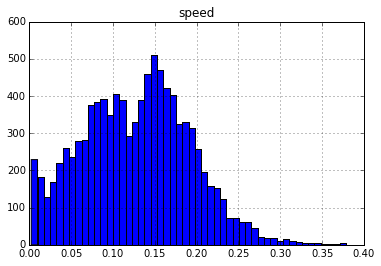

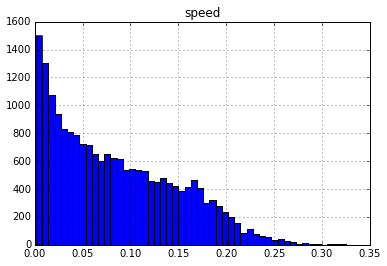

In [35]:
#Created a histogram to check the normal distribution the data

strain_resampled.hist(column='speed', bins=50)

# I need help adding titles to these histograms

### Interpretation of Histograms

Based on the histograms of the respective strain it is clear that the data does not follow a normal distribution.
Therefore t-tests and linear regression cannot be applied to this data set as planned. 

In [ ]:
# I know I should applu Apply Kruskal. wallis statistics to data, however I am not sure how to deal with the array

scipy.stats.mstats.kruskalwallis( , )